In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from inference_set_design.config import Config
from inference_set_design.env import ActiveLearningEnvironment

# Running Inference Set Desing on MNIST dataset
In this tutorial we will demonstrate how to run and evaluate the inference set design pipeline on the MNIST dataset. We will benchmark **Random** and **Least Confidence** (LC) agents. 

### First, let's compare active and random agents on the original MNIST data
It may take some time to run 60 active learning steps for random and active agents ⏳

In [2]:
for agent in ["random", "active"]:
    # Create a config 
    cfg = Config.empty()
    cfg.overwrite_run = False
    cfg.agent_name = agent
    cfg.task_name = "corrupted_mnist" 
    cfg.acquisition_batch_size = 1000
    cfg.model_cfg.train_epochs = 10  
    cfg.model_cfg.model_name = "ResMLP"
    cfg.agent_cfg.acq_weights = (1.0, 0.0)
    cfg.agent_cfg.log_explorable_preds = False
    cfg.agent_cfg.save_model = False
    cfg.task_cfg.corrupted_mnist.corruption_type = "None"
    cfg.task_cfg.corrupted_mnist.data_path = "../../data/MNIST"
    cfg.task_cfg.corrupted_mnist.num_data_workers = 0
    cfg.log_path = f"./runs/MNIST_{cfg.task_cfg.corrupted_mnist.corruption_type}_{cfg.agent_name}"
    env = ActiveLearningEnvironment(cfg)
    # Run active learning loop
    env.run_active_learning_loop()

29/01/2025 11:48:03 - INFO - logger - Config:
----------
hostname: Ihors-MacBook-Pro.local
device: cpu
git_hash: e2fffbc
agent_name: random
agent_cfg:
  acquisition_strategy: greedy
  acq_criteria:
  - uncertainty
  - random
  acq_weights:
  - 1.0
  - 0.0
  log_explorable_preds: false
  save_model: false
  full_inner_loop_monitoring: false
  mc_iterations: 5
task_name: corrupted_mnist
task_cfg:
  rxrx3: null
  qm9: null
  geom: null
  mol3d: null
  corrupted_mnist:
    n_init_train_imgs: 0
    corruption_type: None
    num_data_workers: 0
    shuffle_datasets: false
    data_path: ../../data/MNIST
model_cfg:
  model_name: ResMLP
  lr: 0.001
  l2_reg: 0.0
  grad_clip_norm: 1.0
  dropout: 0.1
  num_ensmbl_members: null
  train_epochs: 10
  train_batch_size: 1024
  early_stop_patience: 50
  n_hidden_layers: 2
  hidden_size: 512
  skip_connections: false
  trunk_hidden_size: 512
  n_trunk_res_block: 2
  task_hidden_size: 512
  n_task_layers: 2
seed: 42
desc: default configuration
log_path:

# Plot results

In [15]:
with open("./runs/MNIST_None_active/metrics.json", "r") as file:
    metrics_none_active = json.load(file)
with open("./runs/MNIST_None_random/metrics.json", "r") as file:
    metrics_none_random = json.load(file)

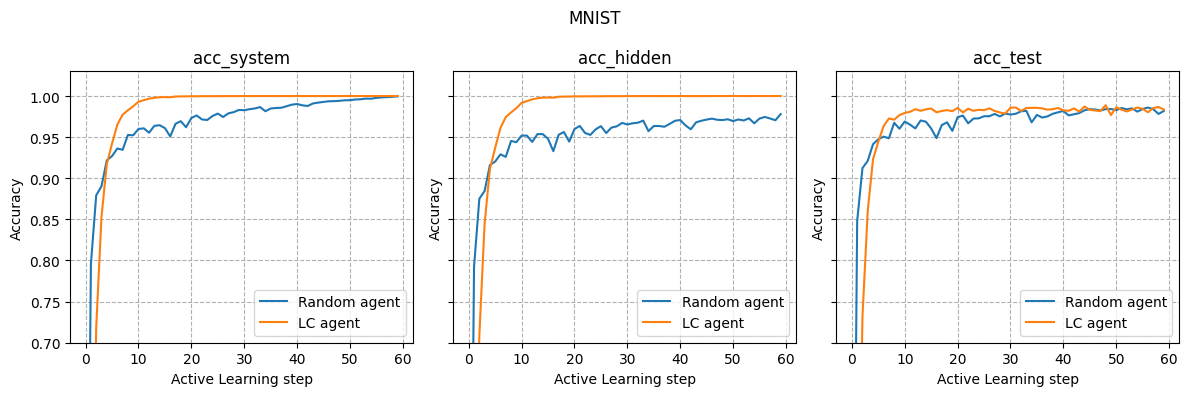

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
plt.suptitle("MNIST")

for i, metric in enumerate(["acc_system", "acc_hidden", "acc_test"]):
    axes[i].set_title(metric)
    axes[i].plot(np.arange(len(metrics_none_random[metric])), 
            metrics_none_random[metric],
            label="Random agent"
            )
    axes[i].plot(np.arange(len(metrics_none_active[metric])), 
            metrics_none_active[metric],
            label="LC agent"
            )
    axes[i].set_xlabel("Active Learning step")
    axes[i].set_ylabel("Accuracy")
    axes[i].legend(loc="lower right")
    axes[i].grid(True, linestyle='--')
    axes[i].set_ylim(0.7, 1.03)
plt.tight_layout()
plt.show()

## Let's now run active acquisition on cropped MNIST
For these experiments the `corrupted_mnist` task uses transform that hides bottom part of the image 

In [ ]:
for agent in ["random", "active"]:
    # Create a config 
    cfg = Config.empty()
    cfg.overwrite_run = False
    cfg.agent_name = agent
    cfg.task_name = "corrupted_mnist" 
    cfg.acquisition_batch_size = 1000
    cfg.model_cfg.train_epochs = 10  
    cfg.model_cfg.model_name = "ResMLP"
    cfg.agent_cfg.acq_weights = (1.0, 0.0)
    cfg.agent_cfg.log_explorable_preds = False
    cfg.agent_cfg.save_model = False
    cfg.task_cfg.corrupted_mnist.corruption_type = "bottom"
    cfg.task_cfg.corrupted_mnist.data_path = "../../data/MNIST"
    cfg.task_cfg.corrupted_mnist.num_data_workers = 0
    cfg.log_path = f"./runs/MNIST_{cfg.task_cfg.corrupted_mnist.corruption_type}_{cfg.agent_name}"
    env = ActiveLearningEnvironment(cfg)
    # Run active learning loop
    env.run_active_learning_loop()

29/01/2025 14:27:12 - INFO - logger - Config:
----------
hostname: Ihors-MacBook-Pro.local
device: cpu
git_hash: e2fffbc
agent_name: random
agent_cfg:
  acquisition_strategy: greedy
  acq_criteria:
  - uncertainty
  - random
  acq_weights:
  - 1.0
  - 0.0
  log_explorable_preds: false
  save_model: false
  full_inner_loop_monitoring: false
  mc_iterations: 5
task_name: corrupted_mnist
task_cfg:
  rxrx3: null
  qm9: null
  geom: null
  mol3d: null
  corrupted_mnist:
    n_init_train_imgs: 0
    corruption_type: bottom
    num_data_workers: 0
    shuffle_datasets: false
    data_path: ../../data/MNIST
model_cfg:
  model_name: ResMLP
  lr: 0.001
  l2_reg: 0.0
  grad_clip_norm: 1.0
  dropout: 0.1
  num_ensmbl_members: null
  train_epochs: 10
  train_batch_size: 1024
  early_stop_patience: 50
  n_hidden_layers: 2
  hidden_size: 512
  skip_connections: false
  trunk_hidden_size: 512
  n_trunk_res_block: 2
  task_hidden_size: 512
  n_task_layers: 2
seed: 42
desc: default configuration
log_pat

In [5]:
with open("./runs/MNIST_bottom_active/metrics.json", "r") as file:
    metrics_bottom_active = json.load(file)
with open("./runs/MNIST_bottom_random/metrics.json", "r") as file:
    metrics_bottom_random = json.load(file)

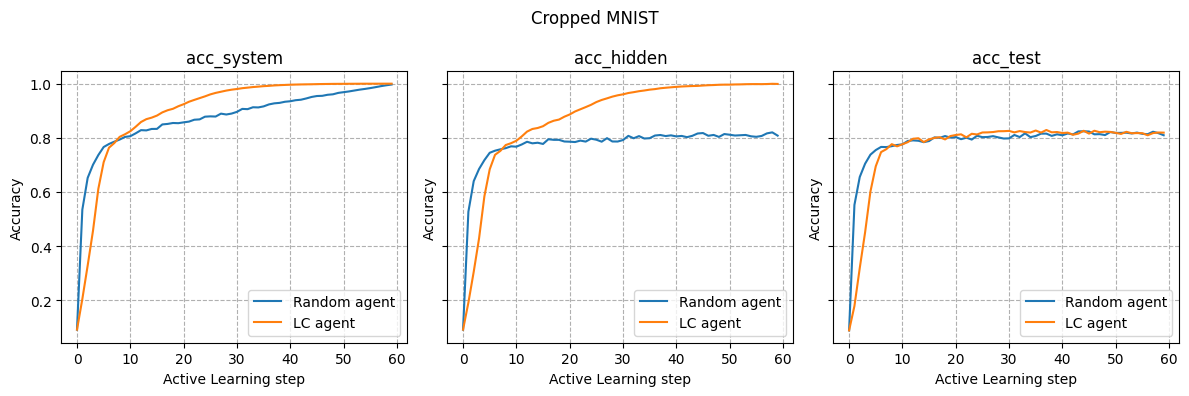

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
plt.suptitle("Cropped MNIST")

for i, metric in enumerate(["acc_system", "acc_hidden", "acc_test"]):
    axes[i].set_title(metric)
    axes[i].plot(np.arange(len(metrics_bottom_random[metric])), 
            metrics_bottom_random[metric],
            label="Random agent"
            )
    axes[i].plot(np.arange(len(metrics_bottom_active[metric])), 
            metrics_bottom_active[metric],
            label="LC agent"
            )
    axes[i].set_xlabel("Active Learning step")
    axes[i].set_ylabel("Accuracy")
    axes[i].legend(loc="lower right")
    axes[i].grid(True, linestyle='--')
plt.tight_layout()
plt.show()